In [1]:
!python3 -m pip install mysqlclient --user


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
myvars = {}
with open("mysql_credentials.txt") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

print(myvars)

{'DB username': 'asambha', 'DB databasename': 'I501_Spring2025_Sec27856_group02_db', 'DB password': 'mount ghoul absorbent'}


In [3]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [4]:
import MySQLdb

conn = MySQLdb.connect(
host="localhost",
user=myvars['DB username'],
passwd=myvars['DB password'],
db=myvars['DB databasename']
)

cursor = conn.cursor()

cursor.execute("SELECT DATABASE()")
print("Connected to:", cursor.fetchone()[0])

Connected to: I501_Spring2025_Sec27856_group02_db


In [5]:
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()
print("Available tables:", [table[0] for table in tables])

Available tables: ['mytable', 'thyroid_clean']


In [6]:
import pandas as pd

cursor.execute("SELECT * FROM mytable")
rows = cursor.fetchall()

columns = [column[0] for column in cursor.description]

df = pd.DataFrame(rows, columns=columns)

df.head()

,new_id,id,age,gender,FT3,FT4,TSH,TPO,TGAb,site,...,multifocality,size,shape,margin,calcification,echo_strength,blood_flow,composition,mal,multilateral
0,1,1,46,1,4.34,12.41,1.6770,0.43,0.98,0,...,b'\x00',4.60,b'\x00',b'\x00',b'\x00',4,b'\x00',1,b'\x01',b'\x01'
1,2,2,61,1,5.40,16.26,2.9050,0.45,1.91,0,...,b'\x00',4.20,b'\x00',b'\x01',b'\x01',4,b'\x01',2,b'\x01',b'\x01'
2,3,3,44,1,3.93,13.39,1.8230,9.15,26.25,0,...,b'\x00',0.70,b'\x00',b'\x01',b'\x00',4,b'\x00',2,b'\x00',b'\x01'
3,4,5,29,0,3.70,13.98,1.2930,0.15,0.81,0,...,b'\x01',1.00,b'\x01',b'\x01',b'\x01',4,b'\x00',2,b'\x01',b'\x01'
4,5,6,37,1,3.60,14.56,0.9380,0.13,21.22,0,...,b'\x00',0.70,b'\x00',b'\x01',b'\x01',4,b'\x00',2,b'\x01',b'\x01'


In [7]:
#converting byte type to integers
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, bytes)).any():
        df[col] = df[col].apply(lambda x: int.from_bytes(x, byteorder='little'))

df.head()

,new_id,id,age,gender,FT3,FT4,TSH,TPO,TGAb,site,...,multifocality,size,shape,margin,calcification,echo_strength,blood_flow,composition,mal,multilateral
0,1,1,46,1,4.34,12.41,1.6770,0.43,0.98,0,...,0,4.60,0,0,0,4,0,1,1,1
1,2,2,61,1,5.40,16.26,2.9050,0.45,1.91,0,...,0,4.20,0,1,1,4,1,2,1,1
2,3,3,44,1,3.93,13.39,1.8230,9.15,26.25,0,...,0,0.70,0,1,0,4,0,2,0,1
3,4,5,29,0,3.70,13.98,1.2930,0.15,0.81,0,...,1,1.00,1,1,1,4,0,2,1,1
4,5,6,37,1,3.60,14.56,0.9380,0.13,21.22,0,...,0,0.70,0,1,1,4,0,2,1,1


In [8]:
#EDA
# overview
print('number of rows and columns = ', df.shape)
print(df.dtypes)
print(df.isnull().sum())

# Summary of statistics
df.describe(include='all')

# Value counts for variables
categorical_cols = ['gender', 'site', 'echo_pattern', 'multifocality', 'shape', 'margin', 
                    'calcification', 'echo_strength', 'blood_flow', 'composition', 'multilateral', 'mal', 'age', 'FT3', 'FT4', 'TSH', 'TPO', 'TGAb', 'size']

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

number of rows and columns =  (1232, 21)
new_id            int64
id                int64
age               int64
gender            int64
FT3              object
FT4              object
TSH              object
TPO              object
TGAb             object
site              int64
echo_pattern      int64
multifocality     int64
size             object
shape             int64
margin            int64
calcification     int64
echo_strength     int64
blood_flow        int64
composition       int64
mal               int64
multilateral      int64
dtype: object
new_id           0
id               0
age              0
gender           0
FT3              0
FT4              0
TSH              0
TPO              0
TGAb             0
site             0
echo_pattern     0
multifocality    0
size             0
shape            0
margin           0
calcification    0
echo_strength    0
blood_flow       0
composition      0
mal              0
multilateral     0
dtype: int64

gender value counts:
gender


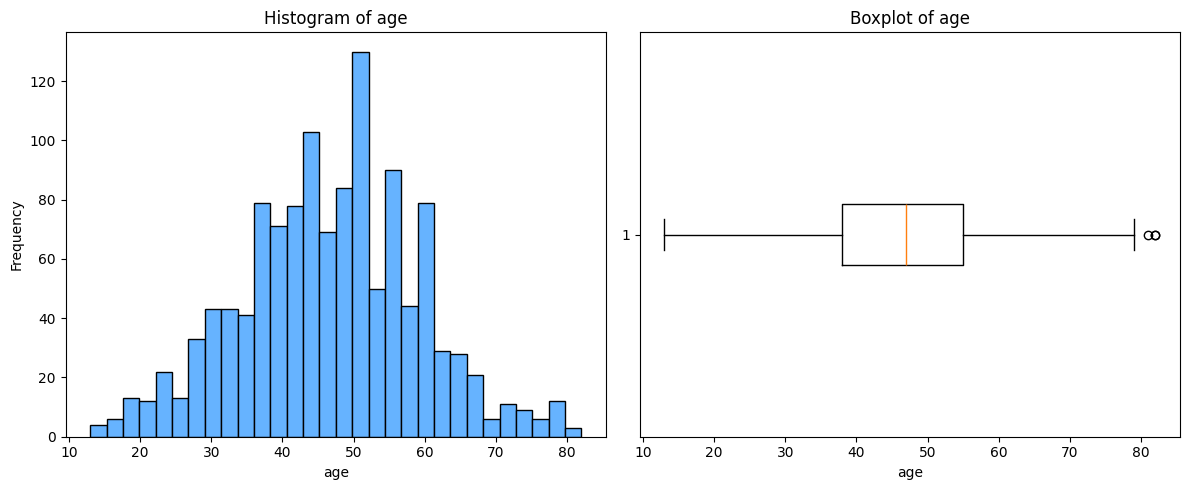

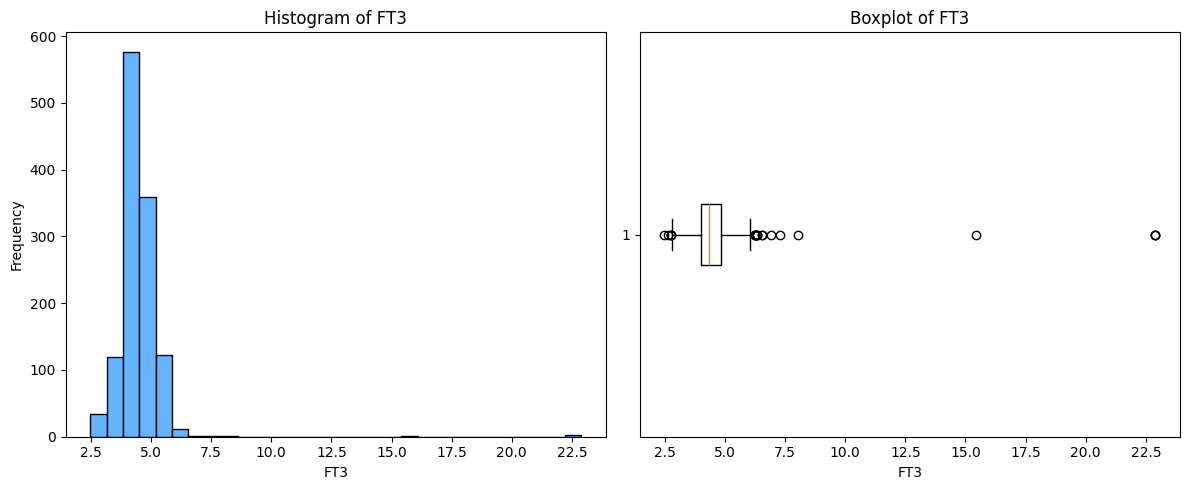

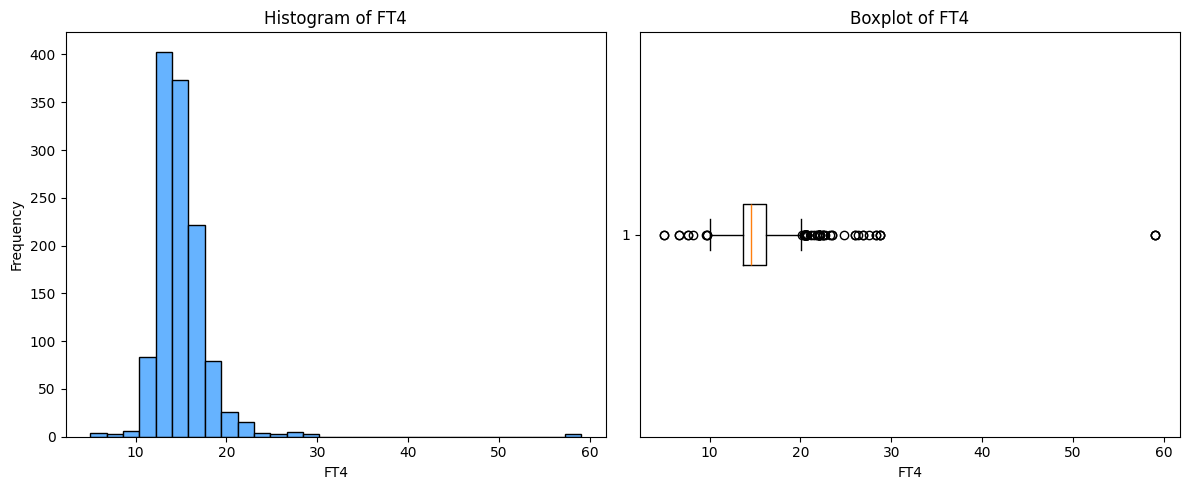

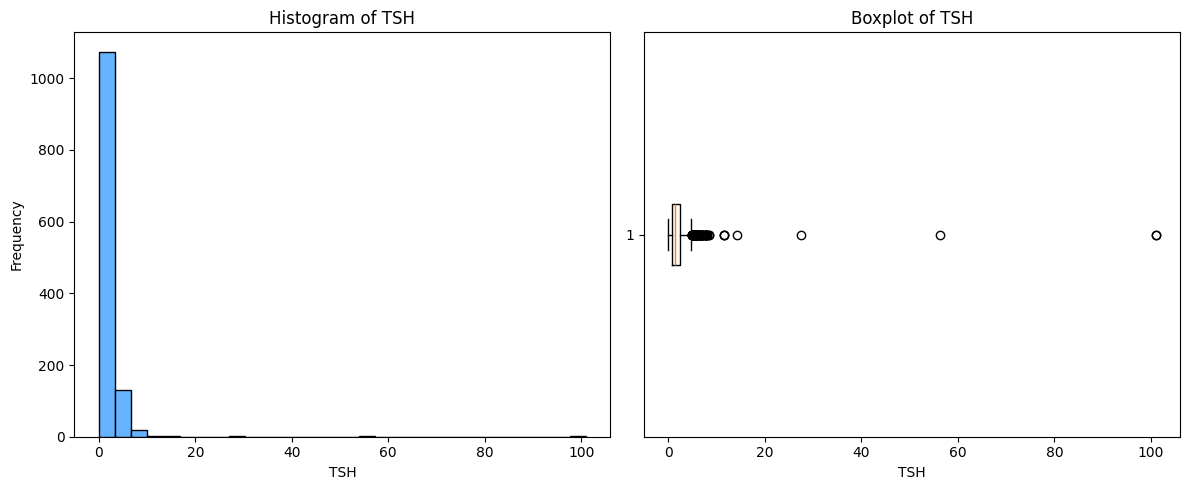

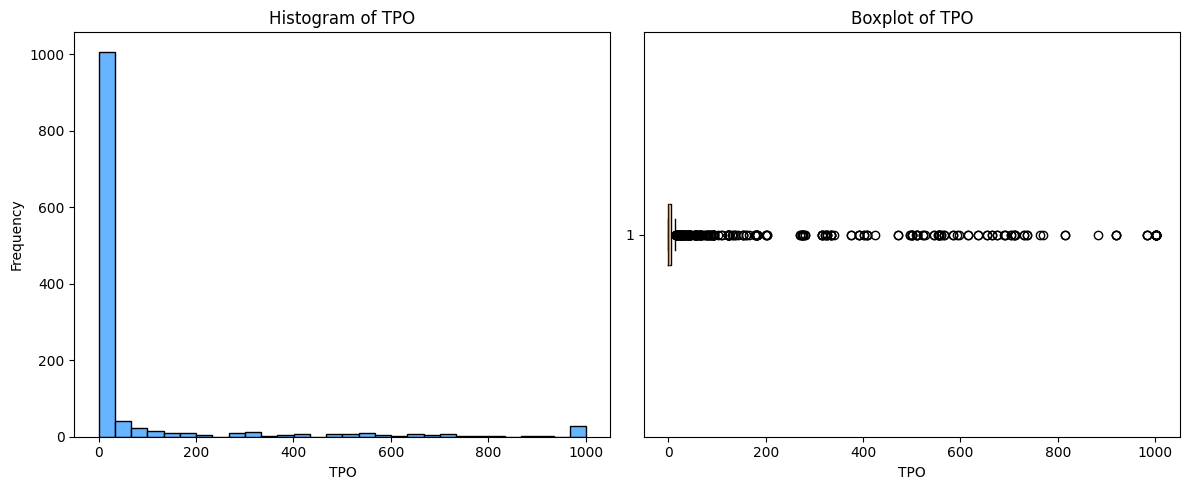

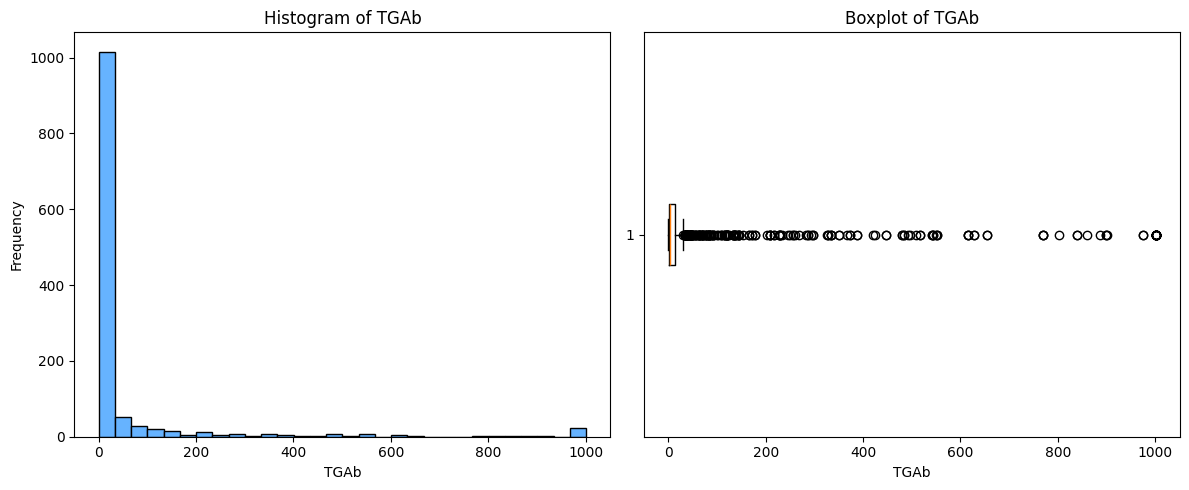

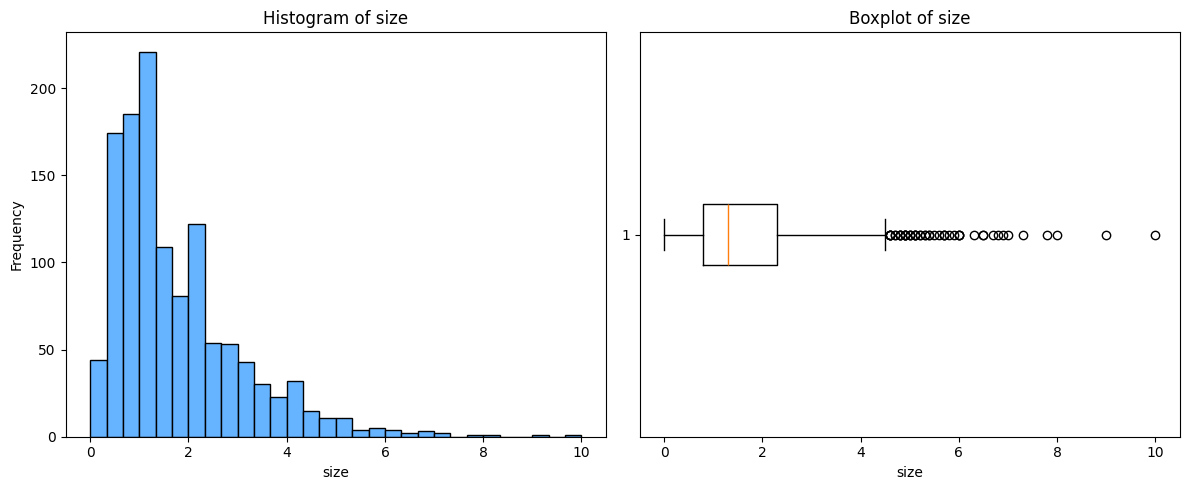

In [9]:
import matplotlib.pyplot as plt

# numeric features to visualize
cols_to_plot = ['age', 'FT3', 'FT4', 'TSH', 'TPO', 'TGAb', 'size']

# Convert decimal columns to float
for col in cols_to_plot:
    df[col] = df[col].astype(float)

# plot histogram and boxplot
def plot_distribution(col):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='#66B3FF', edgecolor='black')
    plt.title("Histogram of " + col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title("Boxplot of " + col)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Loop through and plot each feature
for feature in cols_to_plot:
    plot_distribution(feature)

In [10]:
# For each patient, keep one row by prioritize malignant nodule
def select_malignant_per_patient(df):
    df = df.copy()

    # Sort by patient ID and then by malignancy
    df_sorted = df.sort_values(by=['id', 'mal'], ascending=[True, False])

    # Drop duplicates by patient, keeping the malignant row
    df_unique = df_sorted.drop_duplicates(subset='id', keep='first')

    return df_unique

df_malignancy_priority = select_malignant_per_patient(df)
print("Total patients:", df_malignancy_priority.shape[0])
print("Patients with malignant nodules kept:", df_malignancy_priority['mal'].sum())
print("Patients with benign nodules only:", (df_malignancy_priority['mal'] == 0).sum())

Total patients: 724
Patients with malignant nodules kept: 694
Patients with benign nodules only: 30


Malignancy summary (based on malignancy-priority method):


,Count,Percent
Benign (0),30,4.14
Malignant (1),694,95.86


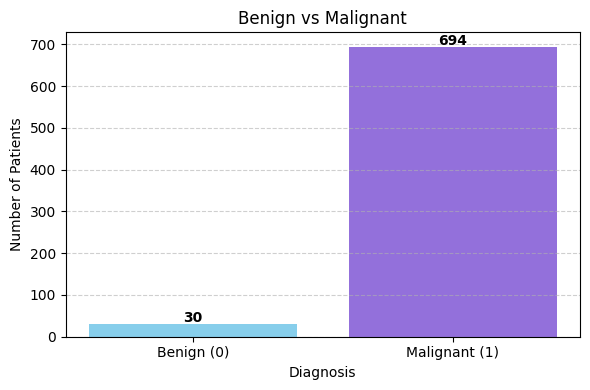

In [11]:
# Calculate counts and percentages
mal_counts = df_malignancy_priority['mal'].value_counts().sort_index()
mal_percent = df_malignancy_priority['mal'].value_counts(normalize=True).sort_index() * 100

# Create summary DataFrame
mal_summary = pd.DataFrame({
    'Count': mal_counts,
    'Percent': mal_percent.round(2)
})
mal_summary.index = ['Benign (0)', 'Malignant (1)']

print("Malignancy summary (based on malignancy-priority method):")
display(mal_summary)

# Plot bar chart
import matplotlib.pyplot as plt

labels = mal_summary.index
values = mal_summary['Count'].values

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'mediumpurple'])
plt.title('Benign vs Malignant')
plt.ylabel('Number of Patients')
plt.xlabel('Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top
for i, v in enumerate(values):
    plt.text(i, v + 5, f"{v}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# converting numerical columns into categorical values
def categorize_lab_values(df):
    df = df.copy()

    # categories for TSH, FT3, FT4
    df['TSH_cat'] = pd.cut(df['TSH'],
                           bins=[-float('inf'), 0.35, 4.94, float('inf')],
                           labels=['Low', 'Normal', 'High'])

    df['FT3_cat'] = pd.cut(df['FT3'],
                           bins=[-float('inf'), 2.63, 5.70, float('inf')],
                           labels=['Low', 'Normal', 'High'])

    df['FT4_cat'] = pd.cut(df['FT4'],
                           bins=[-float('inf'), 9.01, 19.04, float('inf')],
                           labels=['Low', 'Normal', 'High'])

    # For TPOAb and TGAb
    df['TPO_cat'] = pd.cut(df['TPO'],
                           bins=[-float('inf'), 5.61, float('inf')],
                           labels=['Normal', 'High'])

    df['TGAb_cat'] = pd.cut(df['TGAb'],
                            bins=[-float('inf'), 4.11, float('inf')],
                            labels=['Normal', 'High'])

    return df

df_final_categorized = categorize_lab_values(df_malignancy_priority)

df_final_categorized[['TSH', 'TSH_cat', 'FT3', 'FT3_cat', 'FT4', 'FT4_cat', 'TPO', 'TPO_cat', 'TGAb', 'TGAb_cat']].head()

,TSH,TSH_cat,FT3,FT3_cat,FT4,FT4_cat,TPO,TPO_cat,TGAb,TGAb_cat
0,1.677,Normal,4.34,Normal,12.41,Normal,0.43,Normal,0.98,Normal
1,2.905,Normal,5.40,Normal,16.26,Normal,0.45,Normal,1.91,Normal
586,1.823,Normal,3.93,Normal,13.39,Normal,9.15,High,26.25,High
587,1.363,Normal,4.78,Normal,13.70,Normal,0.28,Normal,0.88,Normal
3,1.293,Normal,3.70,Normal,13.98,Normal,0.15,Normal,0.81,Normal


In [13]:
# Display counts for each column
for col in ['TSH_cat', 'FT3_cat', 'FT4_cat', 'TPO_cat', 'TGAb_cat']:
    print(f"\n{col} distribution:")
    print(df_final_categorized[col].value_counts(dropna=False))


TSH_cat distribution:
TSH_cat
Normal    631
Low        50
High       43
Name: count, dtype: int64

FT3_cat distribution:
FT3_cat
Normal    708
High       14
Low         2
Name: count, dtype: int64

FT4_cat distribution:
FT4_cat
Normal    682
High       38
Low         4
Name: count, dtype: int64

TPO_cat distribution:
TPO_cat
Normal    544
High      180
Name: count, dtype: int64

TGAb_cat distribution:
TGAb_cat
Normal    477
High      247
Name: count, dtype: int64


In [14]:
# Categorise tumour size and patient age
# Convert 'size' to categorical bins
df_final_categorized['size_cat'] = pd.cut(
    df_final_categorized['size'],
    bins=[-float('inf'), 1, 2, 4, float('inf')],
    labels=['≤1 cm', '1–2 cm', '2–4 cm', '>4 cm']
)

# Convert 'age' to categorical bins
df_final_categorized['age_cat'] = pd.cut(
    df_final_categorized['age'],
    bins=[-float('inf'), 55, float('inf')],
    labels=['<55 y', '≥55 y']
)

df_final_categorized[['age_cat', 'size_cat']].head()

print("Age category counts:\n", df_final_categorized['age_cat'].value_counts())
print("\nSize category counts:\n", df_final_categorized['size_cat'].value_counts())

Age category counts:
 age_cat
<55 y    574
≥55 y    150
Name: count, dtype: int64

Size category counts:
 size_cat
1–2 cm    253
≤1 cm     221
2–4 cm    197
>4 cm      53
Name: count, dtype: int64


In [15]:
# Check distribution
size_xtab = pd.crosstab(df_final_categorized['size_cat'],
                        df_final_categorized['mal']).rename(
                        columns={0: 'Benign (0)', 1: 'Malignant (1)'})

age_xtab  = pd.crosstab(df_final_categorized['age_cat'],
                        df_final_categorized['mal']).rename(
                        columns={0: 'Benign (0)', 1: 'Malignant (1)'})

print(size_xtab, '\n')
print(age_xtab)

mal       Benign (0)  Malignant (1)
size_cat                           
≤1 cm             13            208
1–2 cm            10            243
2–4 cm             6            191
>4 cm              1             52 

mal      Benign (0)  Malignant (1)
age_cat                           
<55 y            26            548
≥55 y             4            146


In [16]:
# Drop all original numerical columns
df_categorical_only = df_final_categorized.drop(
    columns=['TSH', 'FT3', 'FT4', 'TPO', 'TGAb', 'age', 'size', 'id', 'new_id'],
    errors='ignore' 
)
print("Remaining columns:\n", df_categorical_only.columns.tolist())

Remaining columns:
 ['gender', 'site', 'echo_pattern', 'multifocality', 'shape', 'margin', 'calcification', 'echo_strength', 'blood_flow', 'composition', 'mal', 'multilateral', 'TSH_cat', 'FT3_cat', 'FT4_cat', 'TPO_cat', 'TGAb_cat', 'size_cat', 'age_cat']


In [17]:
df_categorical_only.head()

,gender,site,echo_pattern,multifocality,shape,margin,calcification,echo_strength,blood_flow,composition,mal,multilateral,TSH_cat,FT3_cat,FT4_cat,TPO_cat,TGAb_cat,size_cat,age_cat
0,1,0,0,0,0,0,0,4,0,1,1,1,Normal,Normal,Normal,Normal,Normal,>4 cm,<55 y
1,1,0,0,0,0,1,1,4,1,2,1,1,Normal,Normal,Normal,Normal,Normal,>4 cm,≥55 y
586,1,1,0,0,0,1,0,4,1,2,1,1,Normal,Normal,Normal,High,High,2–4 cm,<55 y
587,0,1,0,0,0,1,1,2,0,2,1,0,Normal,Normal,Normal,Normal,Normal,2–4 cm,<55 y
3,0,0,0,1,1,1,1,4,0,2,1,1,Normal,Normal,Normal,Normal,Normal,≤1 cm,<55 y



Crosstab: gender vs. mal
mal      0    1  All
gender              
0        3  118  121
1       27  576  603
All     30  694  724


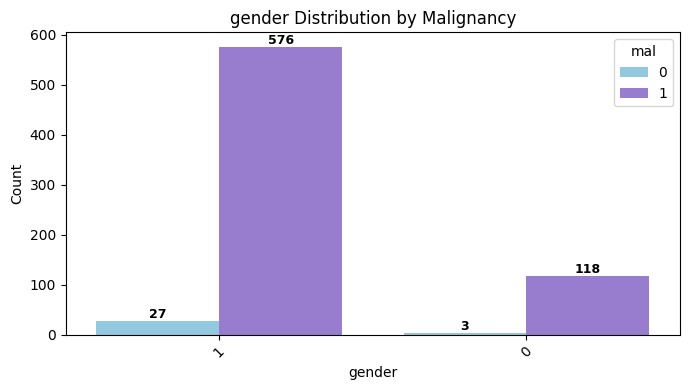


Crosstab: site vs. mal
mal    0    1  All
site              
0     13  423  436
1     13  261  274
2      4   10   14
All   30  694  724


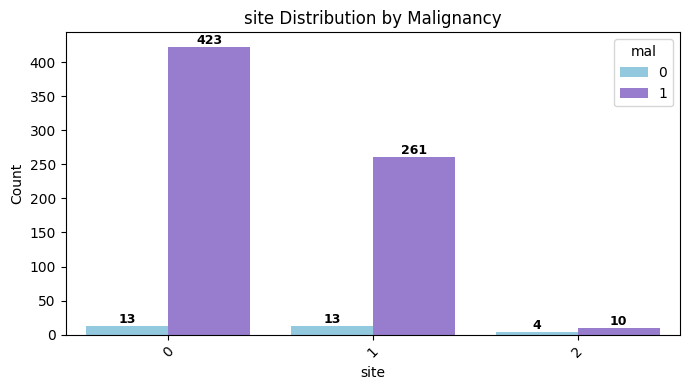


Crosstab: echo_pattern vs. mal
mal            0    1  All
echo_pattern              
0             26  608  634
1              4   86   90
All           30  694  724


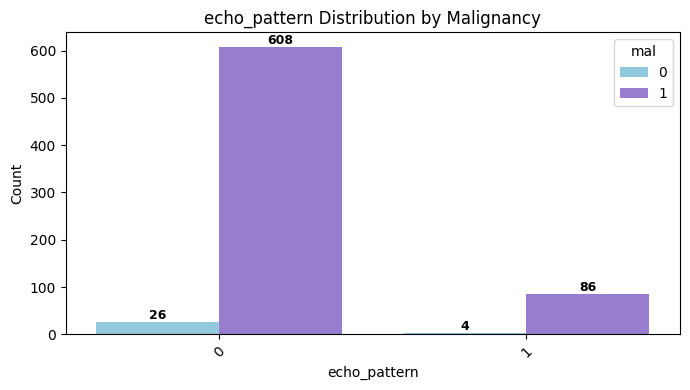


Crosstab: multifocality vs. mal
mal             0    1  All
multifocality              
0              19  379  398
1              11  315  326
All            30  694  724


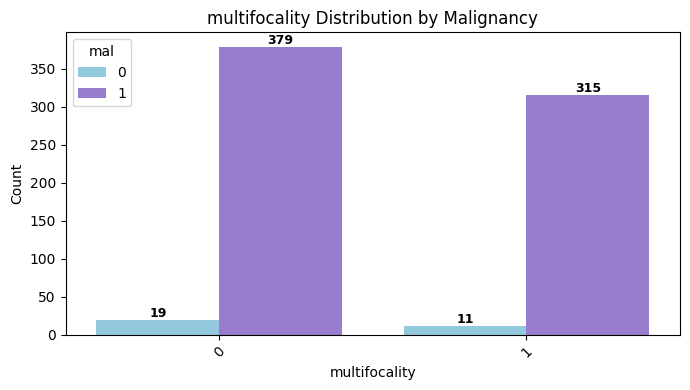


Crosstab: shape vs. mal
mal     0    1  All
shape              
0      26  493  519
1       4  201  205
All    30  694  724


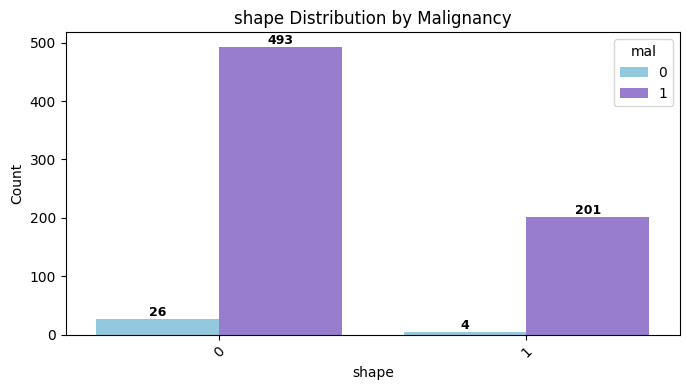


Crosstab: margin vs. mal
mal      0    1  All
margin              
0        8  186  194
1       22  508  530
All     30  694  724


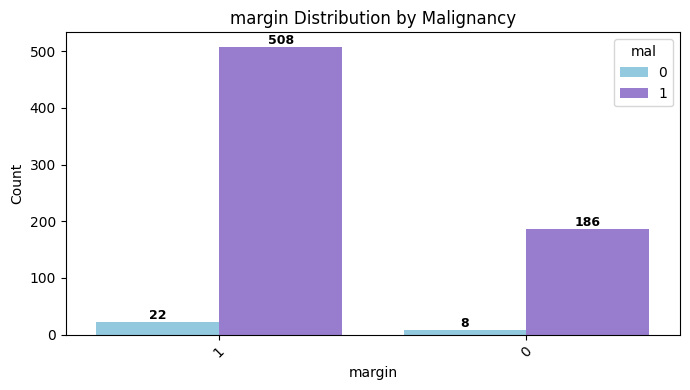


Crosstab: calcification vs. mal
mal             0    1  All
calcification              
0              22  316  338
1               8  378  386
All            30  694  724


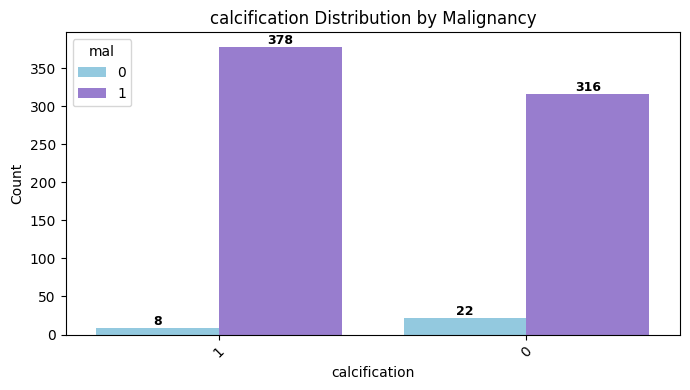


Crosstab: echo_strength vs. mal
mal             0    1  All
echo_strength              
0               1    3    4
1               1    9   10
2               3   69   72
3               0    3    3
4              25  610  635
All            30  694  724


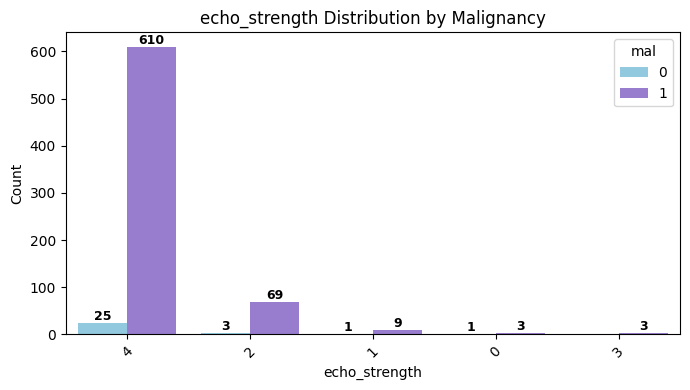


Crosstab: blood_flow vs. mal
mal          0    1  All
blood_flow              
0           19  346  365
1           11  348  359
All         30  694  724


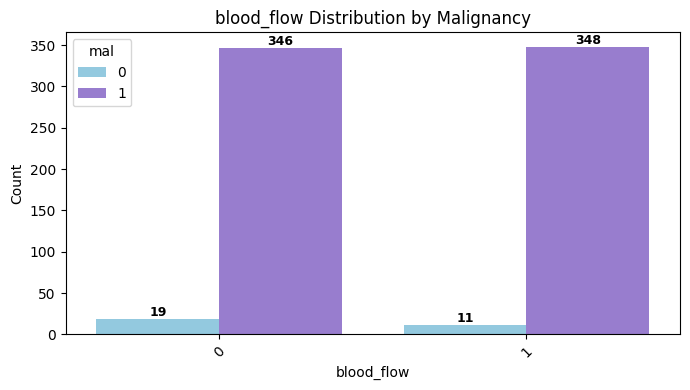


Crosstab: composition vs. mal
mal           0    1  All
composition              
0             0    8    8
1             2   43   45
2            28  643  671
All          30  694  724


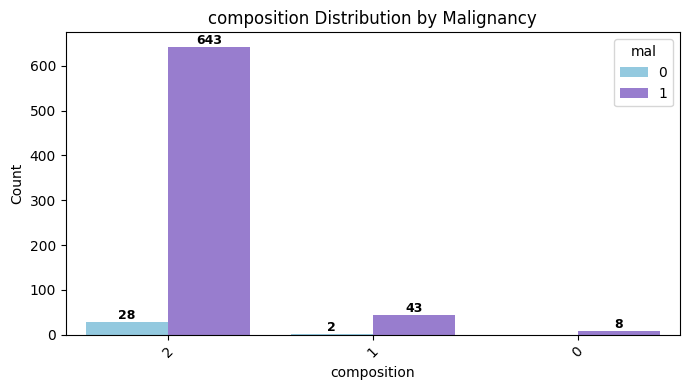


Crosstab: multilateral vs. mal
mal            0    1  All
multilateral              
0             20  266  286
1             10  428  438
All           30  694  724


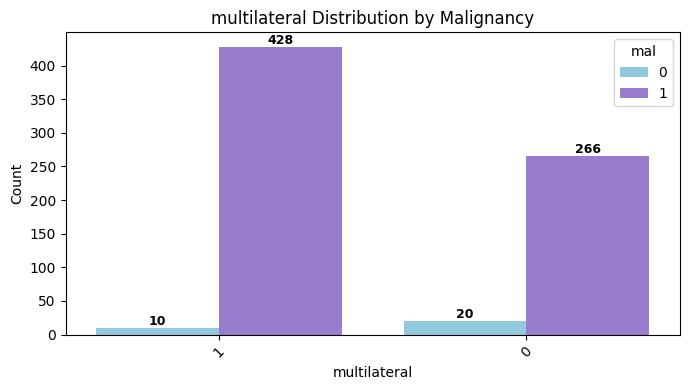


Crosstab: TSH_cat vs. mal
mal       0    1  All
TSH_cat              
Low       3   47   50
Normal   23  608  631
High      4   39   43
All      30  694  724


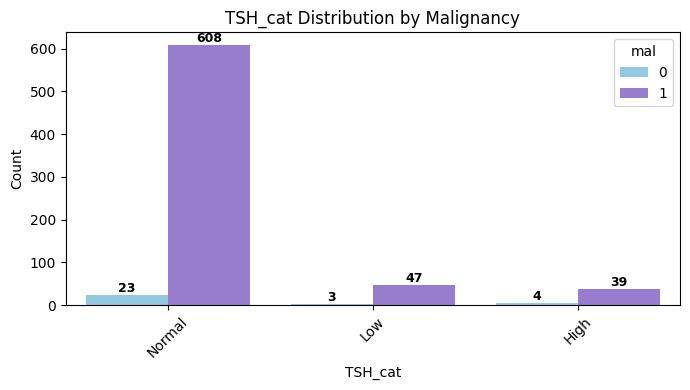


Crosstab: FT3_cat vs. mal
mal       0    1  All
FT3_cat              
Low       1    1    2
Normal   28  680  708
High      1   13   14
All      30  694  724


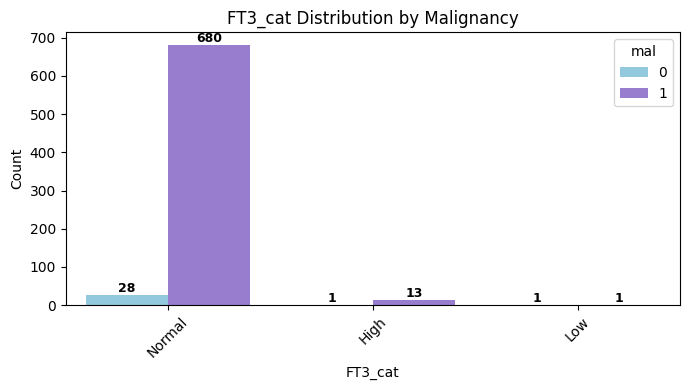


Crosstab: FT4_cat vs. mal
mal       0    1  All
FT4_cat              
Low       0    4    4
Normal   28  654  682
High      2   36   38
All      30  694  724


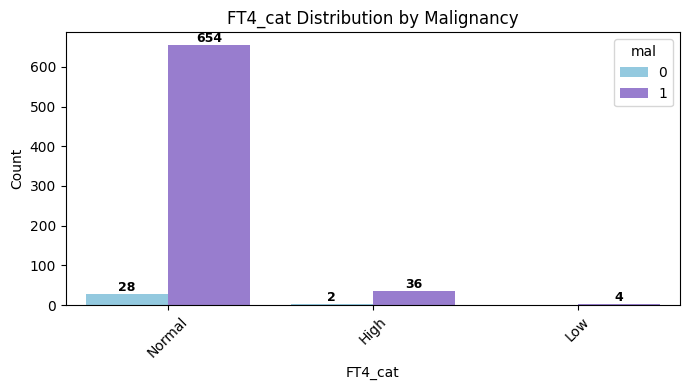


Crosstab: TPO_cat vs. mal
mal       0    1  All
TPO_cat              
Normal   19  525  544
High     11  169  180
All      30  694  724


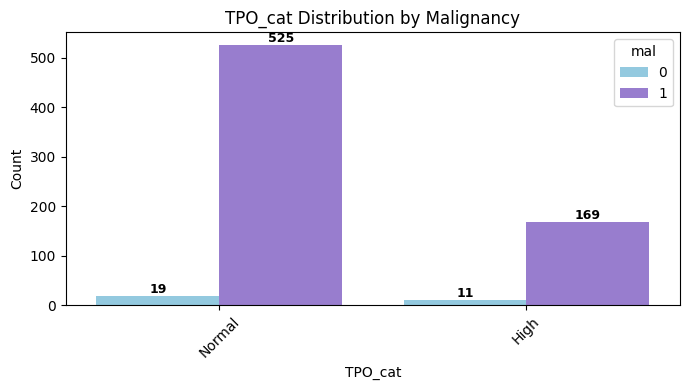


Crosstab: TGAb_cat vs. mal
mal        0    1  All
TGAb_cat              
Normal    17  460  477
High      13  234  247
All       30  694  724


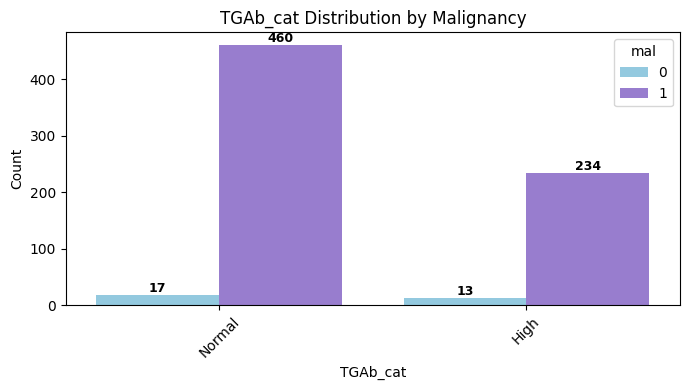


Crosstab: size_cat vs. mal
mal        0    1  All
size_cat              
≤1 cm     13  208  221
1–2 cm    10  243  253
2–4 cm     6  191  197
>4 cm      1   52   53
All       30  694  724


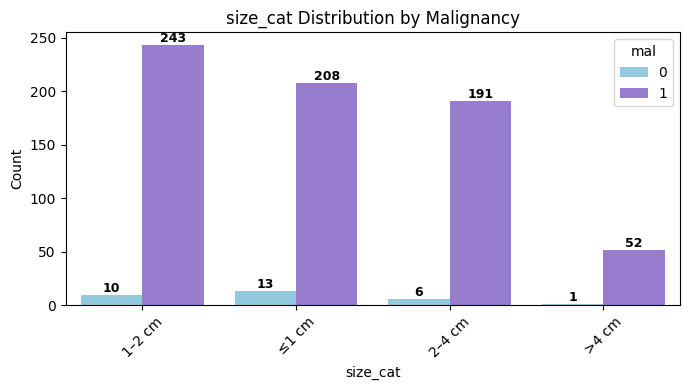


Crosstab: age_cat vs. mal
mal       0    1  All
age_cat              
<55 y    26  548  574
≥55 y     4  146  150
All      30  694  724


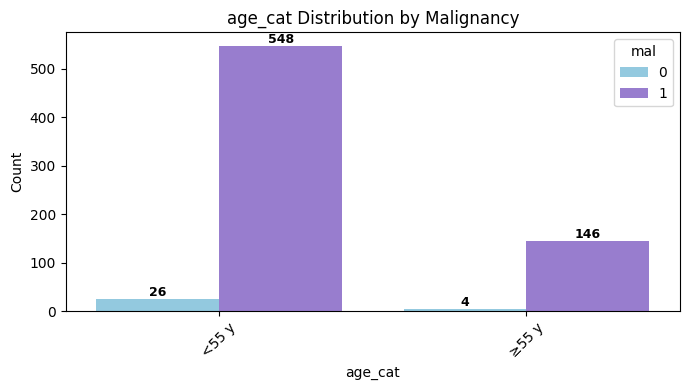

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the annotate function
def annotate_bars(ax):
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

# List of categorical features
categorical_columns = [
    'gender', 'site', 'echo_pattern', 'multifocality', 'shape',
    'margin', 'calcification', 'echo_strength', 'blood_flow',
    'composition', 'multilateral', 'TSH_cat', 'FT3_cat', 'FT4_cat',
    'TPO_cat', 'TGAb_cat', 'size_cat', 'age_cat'
]

# Loop through each feature
for col in categorical_columns:
    # 1. Print crosstab summary
    print(f"\nCrosstab: {col} vs. mal")
    print(pd.crosstab(df_categorical_only[col], df_categorical_only['mal'], margins=True))

    # 2. Plot countplot with annotations
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df_categorical_only, x=col, hue='mal', palette=['skyblue', 'mediumpurple'], hue_order=[0, 1],
                       order=df_categorical_only[col].value_counts().index)
    
    plt.title(f'{col} Distribution by Malignancy')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    annotate_bars(ax) 
    plt.tight_layout()
    plt.show()

In [19]:
# Chi-Square Test
from scipy.stats import chi2_contingency

print("Chi-Square Test Results\n")

for col in categorical_columns:
    table = pd.crosstab(df_categorical_only[col], df_categorical_only['mal'])
    chi2, p, _, _ = chi2_contingency(table)
    result = "significant" if p < 0.05 else "not significant"
    print(f"{col:<18} p = {p:.4f}   {result}")

Chi-Square Test Results

gender             p = 0.4493   not significant
site               p = 0.0000   significant
echo_pattern       p = 1.0000   not significant
multifocality      p = 0.4516   not significant
shape              p = 0.0983   not significant
margin             p = 1.0000   not significant
calcification      p = 0.0051   significant
echo_strength      p = 0.2449   not significant
blood_flow         p = 0.2080   not significant
composition        p = 0.8363   not significant
multilateral       p = 0.0035   significant
TSH_cat            p = 0.1565   not significant
FT3_cat            p = 0.0042   significant
FT4_cat            p = 0.8627   not significant
TPO_cat            p = 0.1894   not significant
TGAb_cat           p = 0.3729   not significant
size_cat           p = 0.3943   not significant
age_cat            p = 0.4299   not significant


/tmp/ipykernel_2868351/1851531250.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi_df, x='p_value', y='Feature', palette='Blues_d')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/chi_square_pvalues.png'

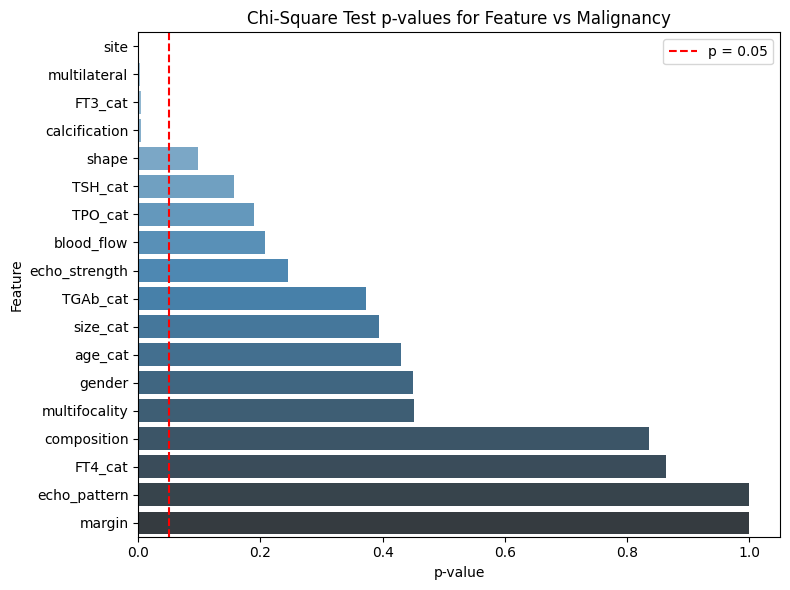

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Apply Chi-Square to all categorical features
p_values = []
for col in df_categorical_only.columns:
    if col != 'mal':
        contingency = pd.crosstab(df_categorical_only[col], df_categorical_only['mal'])
        _, p, _, _ = chi2_contingency(contingency)
        p_values.append((col, p))

# Create DataFrame
chi_df = pd.DataFrame(p_values, columns=['Feature', 'p_value']).sort_values(by='p_value')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=chi_df, x='p_value', y='Feature', palette='Blues_d')
plt.axvline(x=0.05, color='red', linestyle='--', label='p = 0.05')
plt.title('Chi-Square Test p-values for Feature vs Malignancy')
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.savefig('/mnt/data/chi_square_pvalues.png')
plt.show()


In [21]:
#Train-Test Split (with stratified sampling)
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_categorical_only.drop(columns=['mal']) 
y = df_categorical_only['mal']                 

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,        
    random_state=42    
)

# print counts and percentages
def print_distribution(name, labels):
    counts = labels.value_counts()
    percentages = labels.value_counts(normalize=True) * 100
    print(f"\n{name} set class distribution:")
    for cls in counts.index:
        print(f"Class {cls}: {counts[cls]} samples ({percentages[cls]:.2f}%)")

# Show distributions
print_distribution("Original", y)
print_distribution("Training", y_train)
print_distribution("Testing", y_test)


Original set class distribution:
Class 1: 694 samples (95.86%)
Class 0: 30 samples (4.14%)

Training set class distribution:
Class 1: 555 samples (95.85%)
Class 0: 24 samples (4.15%)

Testing set class distribution:
Class 1: 139 samples (95.86%)
Class 0: 6 samples (4.14%)


In [22]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [23]:
#usign SMOTE to balance the training set
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# encode categorical features
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Apply SMOTE to the encoded training set
smote = SMOTE(random_state=42)
X_train_bal_smote, y_train_bal_smote = smote.fit_resample(X_train_encoded, y_train)

# Convert back to DataFrame to match original structure
X_train_bal_smote = pd.DataFrame(X_train_bal_smote, columns=X_train.columns)

# Show the new balanced class distribution
print("Balanced training set class distribution after SMOTE:")
print(pd.Series(y_train_bal_smote).value_counts())

Balanced training set class distribution after SMOTE:
mal
1    555
0    555
Name: count, dtype: int64


In [24]:
print("test distribution:\n", y_test.value_counts())

test distribution:
 mal
1    139
0      6
Name: count, dtype: int64


Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      0.99      0.98       139

    accuracy                           0.95       145
   macro avg       0.48      0.50      0.49       145
weighted avg       0.92      0.95      0.93       145

ROC AUC: 0.6714628297362111


/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


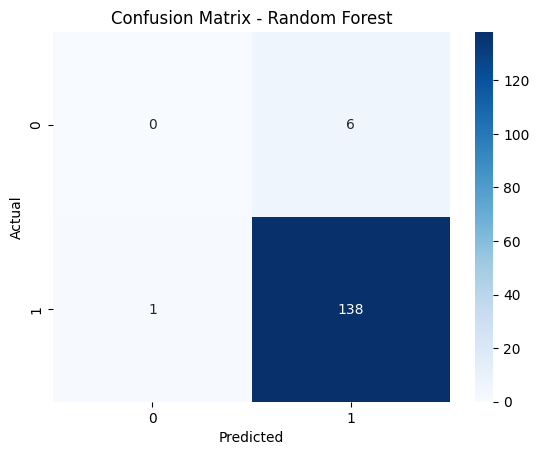

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal_smote, y_train_bal_smote)

# Evaluate
y_pred_rf = rf.predict(X_test_encoded)
y_prob_rf = rf.predict_proba(X_test_encoded)[:, 1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/home/students/asambha/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      0.99      0.97       139

    accuracy                           0.94       145
   macro avg       0.48      0.49      0.49       145
weighted avg       0.92      0.94      0.93       145

ROC AUC: 0.5683453237410072


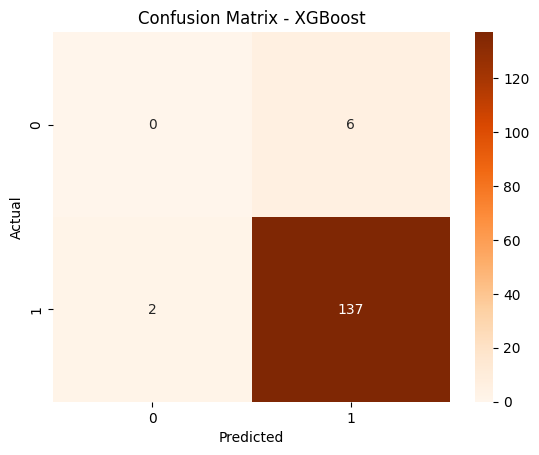

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create XGBoost model and train on balanced training set
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal_smote, y_train_bal_smote)

# Predict on test set
y_pred_xgb = xgb.predict(X_test_encoded)
y_prob_xgb = xgb.predict_proba(X_test_encoded)[:, 1]

# Print performance metrics
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- Neural Network (MLP) ---
              precision    recall  f1-score   support

           0       0.18      0.33      0.24         6
           1       0.97      0.94      0.95       139

    accuracy                           0.91       145
   macro avg       0.58      0.63      0.59       145
weighted avg       0.94      0.91      0.92       145

ROC AUC: 0.6258992805755396


/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


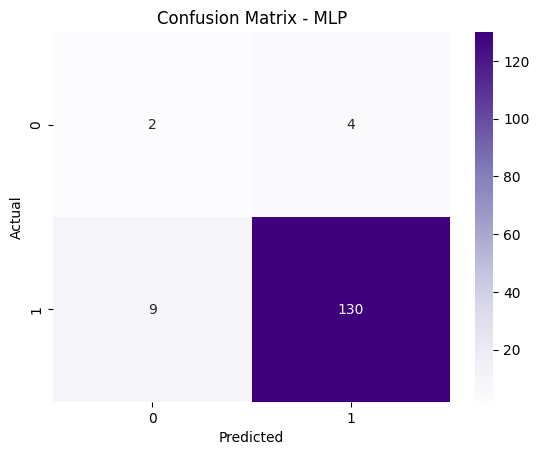

In [27]:
from sklearn.neural_network import MLPClassifier

# MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp.fit(X_train_bal_smote, y_train_bal_smote)

# Predict on test set
y_pred_mlp = mlp.predict(X_test_encoded)
y_prob_mlp = mlp.predict_proba(X_test_encoded)[:, 1]

# Print performance metrics
print("--- Neural Network (MLP) ---")
print(classification_report(y_test, y_pred_mlp, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, y_prob_mlp))

# Plot confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/home/students/asambha/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Ensemble Model 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      0.99      0.97       139

    accuracy                           0.94       145
   macro avg       0.48      0.49      0.49       145
weighted avg       0.92      0.94      0.93       145

ROC AUC: 0.6342925659472423


/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X do

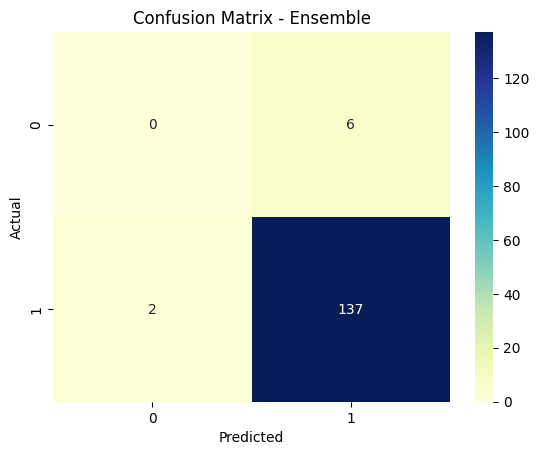

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine all 3 models into one ensemble
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('xgb', xgb), 
        ('mlp', mlp)
        
    ],
    voting='soft'
)

# Train on balanced training data
ensemble.fit(X_train_bal_smote, y_train_bal_smote)

# Predict on original test set
y_pred_ens = ensemble.predict(X_test_encoded)
y_prob_ens = ensemble.predict_proba(X_test_encoded)[:, 1]

# Show results
print(" Ensemble Model ")
print(classification_report(y_test, y_pred_ens, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, y_prob_ens))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_ens)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
# Compare model performance: Random Forest, XGBoost, MLP, and Ensemble

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# function to calculate metrics
def get_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_prob)
    return precision, recall, f1, auc, accuracy

# metrics for each model
rf_metrics = get_metrics(y_test, y_pred_rf, y_prob_rf)
xgb_metrics = get_metrics(y_test, y_pred_xgb, y_prob_xgb)
mlp_metrics = get_metrics(y_test, y_pred_mlp, y_prob_mlp)
ens_metrics = get_metrics(y_test, y_pred_ens, y_prob_ens)

# Create a DataFrame to display
import pandas as pd

comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'MLP': mlp_metrics,
    'Ensemble': ens_metrics
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']).T

comparison_df = comparison_df.round(3)

print("\nModel Performance Comparison (Malignant):")
display(comparison_df)


Model Performance Comparison (Malignant):


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest,0.958,0.993,0.975,0.671,0.952
XGBoost,0.958,0.986,0.972,0.568,0.945
MLP,0.970,0.935,0.952,0.626,0.910
Ensemble,0.958,0.986,0.972,0.634,0.945


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# function for benign class 
def get_metrics_for_benign(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=0, zero_division=0)
    recall = recall_score(y_true, y_pred, pos_label=0, zero_division=0)
    f1 = f1_score(y_true, y_pred, pos_label=0, zero_division=0)
    auc = roc_auc_score(y_true, 1 - y_prob)  
    return accuracy, precision, recall, f1, auc

# Compute metrics
rf_metrics_0 = get_metrics_for_benign(y_test, y_pred_rf, y_prob_rf)
xgb_metrics_0 = get_metrics_for_benign(y_test, y_pred_xgb, y_prob_xgb)
mlp_metrics_0 = get_metrics_for_benign(y_test, y_pred_mlp, y_prob_mlp)
ens_metrics_0 = get_metrics_for_benign(y_test, y_pred_ens, y_prob_ens)

# Create DataFrame with accuracy
comparison_df_0 = pd.DataFrame({
    'Random Forest': rf_metrics_0,
    'XGBoost': xgb_metrics_0,
    'MLP': mlp_metrics_0,
    'Ensemble': ens_metrics_0
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']).T.round(3)

print("\nModel Performance Comparison (Benign):")
print(comparison_df_0)



Model Performance Comparison (Benign):
               Accuracy  Precision  Recall  F1-Score  ROC AUC
Random Forest     0.952      0.000   0.000     0.000    0.329
XGBoost           0.945      0.000   0.000     0.000    0.432
MLP               0.910      0.182   0.333     0.235    0.374
Ensemble          0.945      0.000   0.000     0.000    0.366


<Figure size 1000x600 with 0 Axes>

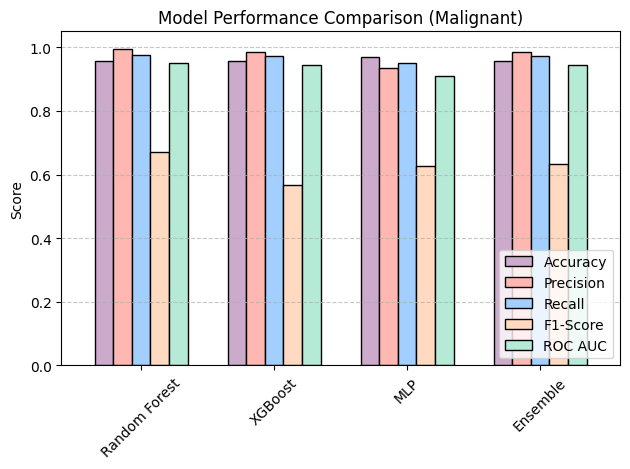

In [31]:
import matplotlib.pyplot as plt

colors = [
    '#CBAACB', 
    '#FFB7B2', 
    '#A2CFFE',
    '#FFDAC1',
    '#B5EAD7' 
] 

# Plotting model comparison
plt.figure(figsize=(10, 6))

comparison_df.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    width=0.7,
)

plt.title('Model Performance Comparison (Malignant)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

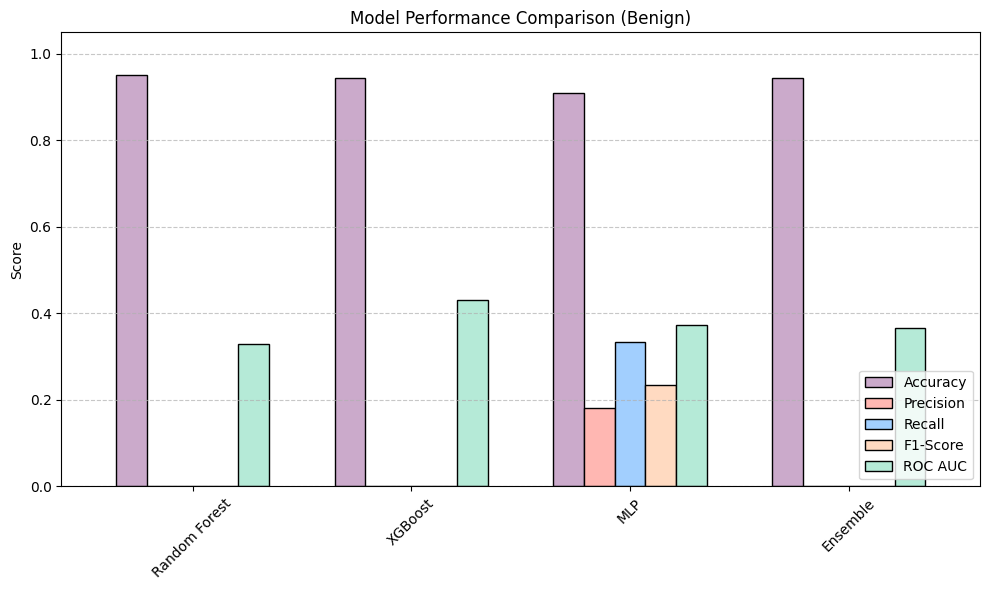

In [32]:
import matplotlib.pyplot as plt

colors = [
    '#CBAACB', 
    '#FFB7B2', 
    '#A2CFFE',
    '#FFDAC1',
    '#B5EAD7' 
] 

# Plotting model comparison for benign class
plt.figure(figsize=(10, 6))

comparison_df_0.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    width=0.7,
    ax=plt.gca()
)

plt.title('Model Performance Comparison (Benign)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/students/asambha/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feat


Permutation Feature Importance:


,Feature,Importance Mean,Importance Std
10,multilateral,0.008276,0.005161
8,blood_flow,0.002069,0.003160
6,calcification,0.000690,0.003714


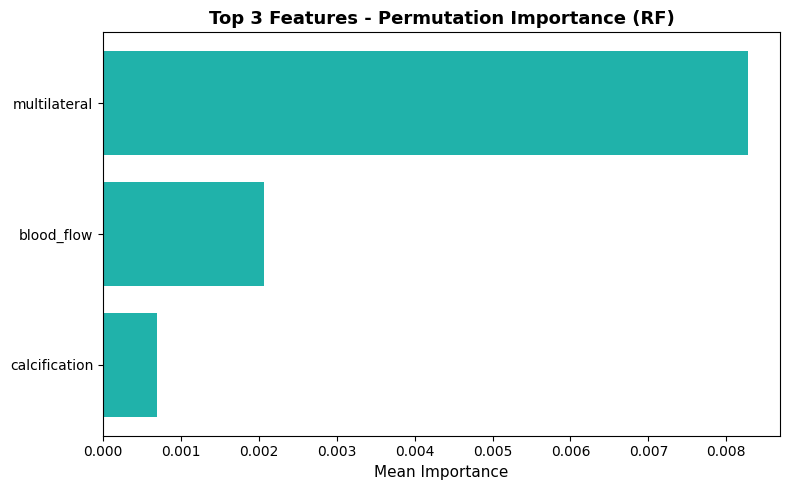

In [35]:
# Permutation Importance (Random Forest)
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Calculate permutation importance
perm_result = permutation_importance(
    rf, X_test_encoded, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Create DataFrame
perm_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_result.importances_mean,
    'Importance Std': perm_result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

# top 3 features
print("\nPermutation Feature Importance:")
display(perm_importances.head(3))

# Plot Permutation Importance
plt.figure(figsize=(8, 5))
plt.barh(
    perm_importances['Feature'][:3],
    perm_importances['Importance Mean'][:3],
    color='lightseagreen'
)
plt.gca().invert_yaxis()
plt.title('Top 3 Features - Permutation Importance (RF)', fontsize=13, fontweight='bold')
plt.xlabel('Mean Importance', fontsize=11)
plt.tight_layout()
plt.show()


SHAP Analysis – Malignant Class (Class 1)
shap_values_rf.values shape: (145, 18, 2)


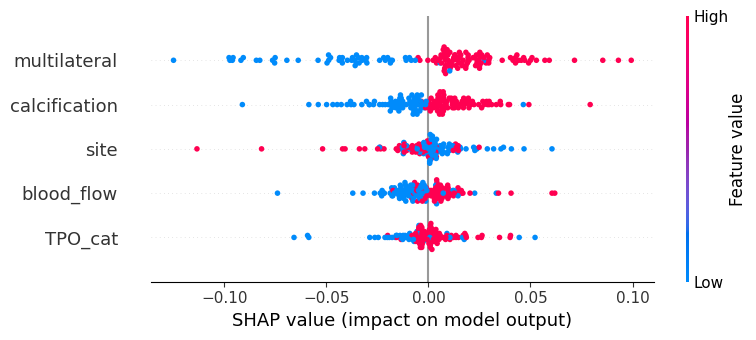

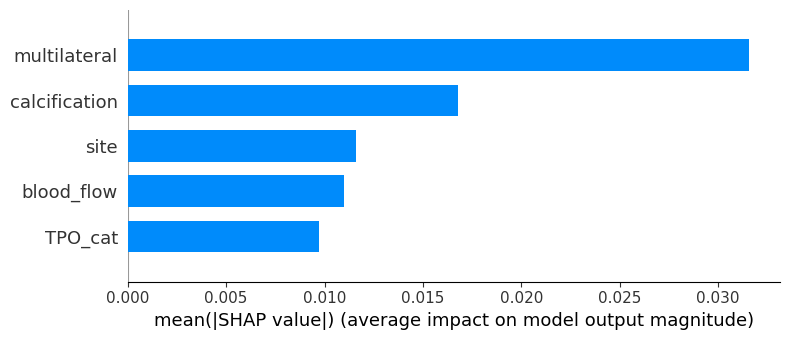

In [39]:
import shap
import pandas as pd

print("SHAP Analysis – Malignant Class (Class 1)")

# First: Convert to DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=X_test.columns)

# Then: Use shap.Explainer
explainer_rf = shap.Explainer(rf, X_test_encoded_df)

# Calculate SHAP values
shap_values_rf = explainer_rf(X_test_encoded_df)

# Confirm the shape
print("shap_values_rf.values shape:", shap_values_rf.values.shape)

# Plot summary for class 1 (Malignant)
shap.summary_plot(
    shap_values_rf.values[:, :, 1],
    features=X_test_encoded_df,
    feature_names=X_test_encoded_df.columns,
    max_display=5
)

# Plot bar chart for class 1 (Malignant)
shap.summary_plot(
    shap_values_rf.values[:, :, 1],
    features=X_test_encoded_df,
    feature_names=X_test_encoded_df.columns,
    plot_type="bar",
    max_display=5
)


SHAP Analysis – Benign Class (Class 0)
shap_values_rf.values shape: (145, 18, 2)


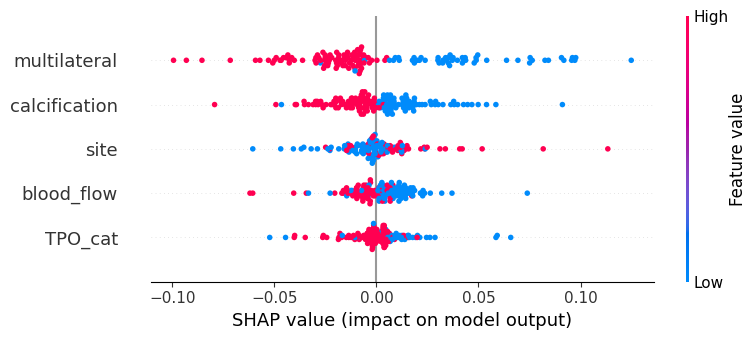

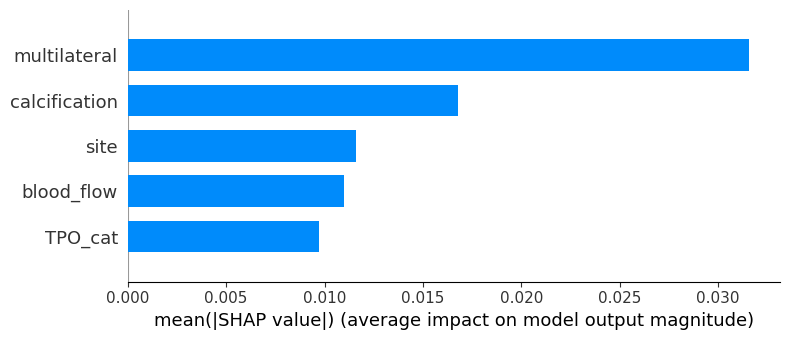

In [40]:
import shap

print("SHAP Analysis – Benign Class (Class 0)")

# Use SHAP explainer
explainer_rf = shap.Explainer(rf, X_test_encoded_df)

# Calculate SHAP values
shap_values_rf = explainer_rf(X_test_encoded_df)

# Confirm shape
print("shap_values_rf.values shape:", shap_values_rf.values.shape)

# Plot SHAP summary for class 0 (Benign)
shap.summary_plot(shap_values_rf.values[:, :, 0], 
                  features=X_test_encoded_df, 
                  feature_names=X_test_encoded_df.columns, 
                  max_display=5)

# Plot SHAP bar chart for class 0 (Benign)
shap.summary_plot(shap_values_rf.values[:, :, 0], 
                  features=X_test_encoded_df, 
                  feature_names=X_test_encoded_df.columns, 
                  plot_type="bar", 
                  max_display=5)


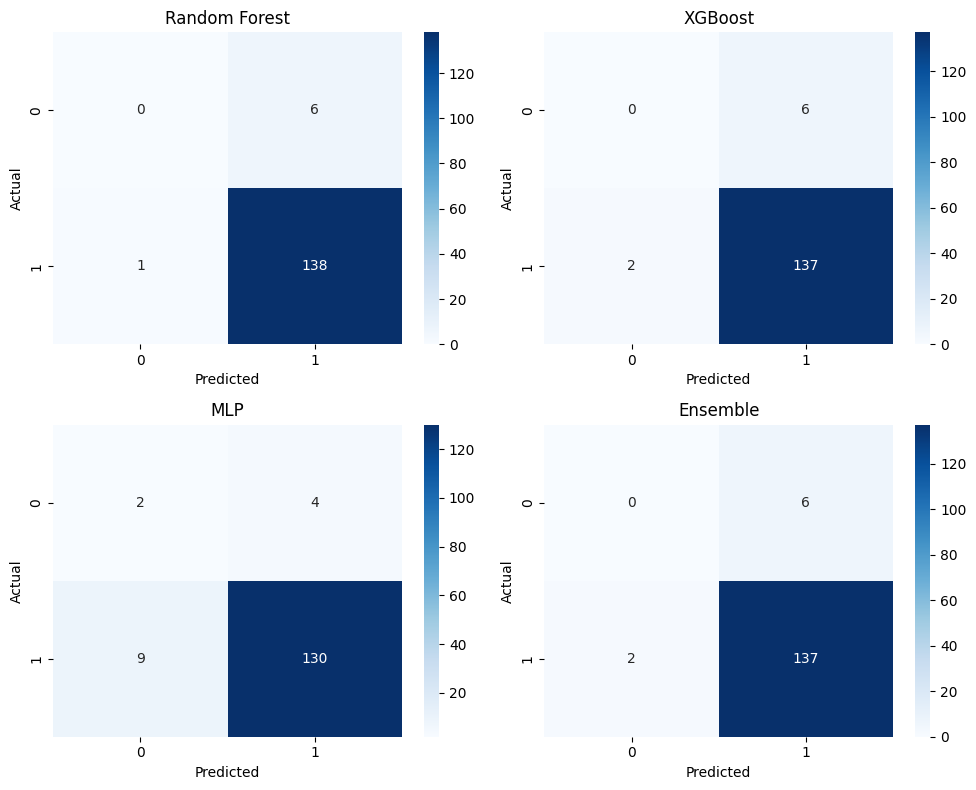

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
models_cm = [
   ('Random Forest', cm_rf),
   ('XGBoost', cm_xgb),
   ('MLP', cm_mlp),
   ('Ensemble', cm)
]
 
for ax, (title, cmatrix) in zip(axes.flatten(), models_cm):
   sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", ax=ax)
   ax.set_title(title)
   ax.set_xlabel("Predicted")
   ax.set_ylabel("Actual")
 
plt.tight_layout()
plt.show()